### Data Vizualization

In [1]:
# installations (be careful!!!)
#!pip install missingno

In [1]:
# all modules

import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from zipfile import ZipFile

In [2]:
# global stuff

warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_rows', 13)
pd.set_option('display.max_columns', 13)

In [3]:
# load dataset

data = pd.read_csv('../data/results/analysed_age_info.csv')
data

,Country,Job_Title,age,Quantity,Percentage
0,UnitedKingdom,unemployed,43,27,2.8%
1,Germany,unemployed,19,27,2.8%
2,Germany,unemployed,18,26,2.69%
3,Germany,unemployed,17,26,2.69%
4,Spain,unemployed,41,25,2.59%
...,...,...,...,...,...
6135,Latvia,unemployed,14,1,0.1%
6136,Portugal,unemployed,14,1,0.1%
6137,Slovakia,unemployed,14,1,0.1%
6138,UnitedKingdom,Data Security Administrator,14,1,0.1%


In [4]:
serie_grouped = data.groupby(['Job_Title'])['Quantity'].count()
df_grouped = pd.DataFrame(serie_grouped).reset_index()
df_grouped_desc = df_grouped.sort_values(by='Quantity', ascending=False)
graphic_pos = df_grouped_desc.head(5)
graphic_pos

,Job_Title,Quantity
156,unemployed,844
58,Data Officer,90
132,Geographic Information Systems Data Specialist...,84
1,Automatic Data Processing Customer Liaison (AD...,80
15,Computer or Data Processing Systems Consultant,80


In [5]:
df_grouped_desc_onlyJobs = df_grouped_desc[df_grouped_desc.Job_Title !='unemployed']
graphic_job = df_grouped_desc_onlyJobs.head()
graphic_job

,Job_Title,Quantity
58,Data Officer,90
132,Geographic Information Systems Data Specialist...,84
1,Automatic Data Processing Customer Liaison (AD...,80
15,Computer or Data Processing Systems Consultant,80
23,Data Architect,79


In [6]:
serie_grouped2 = data.groupby(['Job_Title','age'])['Quantity'].count()
df_grouped2 = pd.DataFrame(serie_grouped2).reset_index()
df_grouped_desc2 = df_grouped2.sort_values(by='Quantity', ascending=False)
graphic_unem_age = df_grouped_desc2.head(10)
graphic_unem_age

,Job_Title,age,Quantity
3026,unemployed,20,22
3025,unemployed,19,22
3029,unemployed,23,21
3036,unemployed,30,21
3028,unemployed,22,21
3022,unemployed,16,21
3023,unemployed,17,20
3032,unemployed,26,20
3027,unemployed,21,20
3024,unemployed,18,19


In [16]:
serie_grouped3 = data.groupby(['Country','Job_Title'])['Quantity'].count()
df_grouped3 = pd.DataFrame(serie_grouped3).reset_index()
df_grouped_desc3 = df_grouped3.sort_values(by='Quantity', ascending=False)
graphic_unem_country = df_grouped_desc3.head(10)
graphic_unem_country

,Country,Job_Title,Quantity
1865,UnitedKingdom,unemployed,52
1017,Italy,unemployed,52
685,Germany,unemployed,52
550,France,unemployed,52
1295,Poland,unemployed,51
1664,Spain,unemployed,51
1164,Netherlands,unemployed,44
762,Greece,unemployed,42
1732,Sweden,unemployed,37
115,Belgium,unemployed,37


In [17]:
serie_grouped4 = data.groupby(['Country'])['Quantity'].count()
df_grouped4 = pd.DataFrame(serie_grouped4).reset_index()
df_grouped4 = df_grouped4.sort_values(by='Quantity', ascending=False)
graphic_amountsurveys_country = df_grouped4.head(10)
graphic_amountsurveys_country

,Country,Quantity
10,Germany,778
9,France,694
14,Italy,667
27,UnitedKingdom,640
25,Spain,584
20,Poland,542
22,Romania,275
19,Netherlands,207
21,Portugal,176
11,Greece,174


In [20]:
def plot_returns(graphic_pos):
    title = 'Top 5 total jobs'
    graphics = graphic_pos.sort_values('Quantity', ascending=False)
    plt.figure(figsize=(15, 8))
    chart = sns.barplot(data=graphics, x='Job_Title', y='Quantity')
    plt.title(title + "\n", fontsize=16)
    return chart

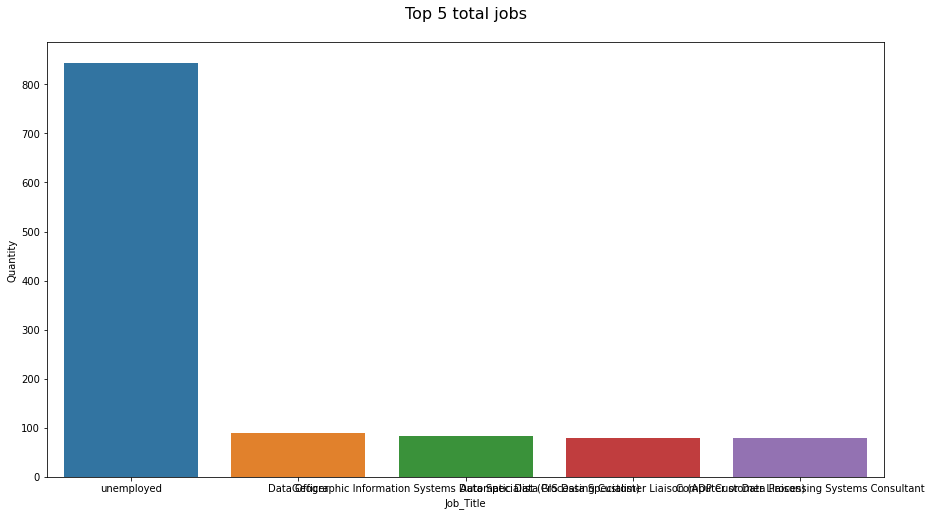

In [21]:
plot_returns(graphic_pos);

In [22]:
def Top5JobTitles(graphic_job):
    title = 'Top 5 job titles'
    graphics = graphic_job.sort_values('Quantity', ascending=False)
    plt.figure(figsize=(15, 8))
    chart_job = sns.barplot(data=graphics, x='Job_Title', y='Quantity')
    plt.title(title + "\n", fontsize=16)
    return chart_job

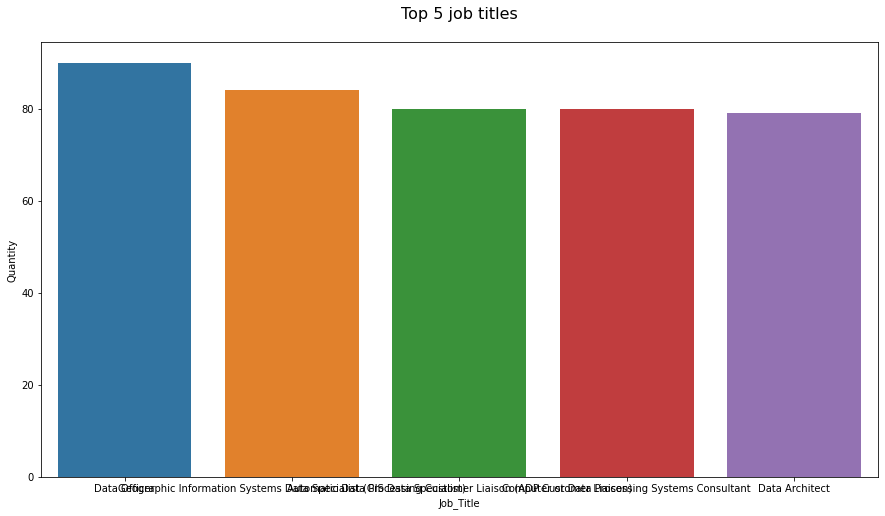

In [23]:
Top5JobTitles(graphic_job);

In [24]:
def AmountUnemployedAge(graphic_unem_age):
    title = 'Top 10 amount of unemployed per age'
    graphics = graphic_unem_age.sort_values('Quantity', ascending=False)
    plt.figure(figsize=(15, 8))
    chart_unem_age = sns.barplot(data=graphics, x='age', y='Quantity')
    plt.title(title + "\n", fontsize=16)
    return chart_unem_age

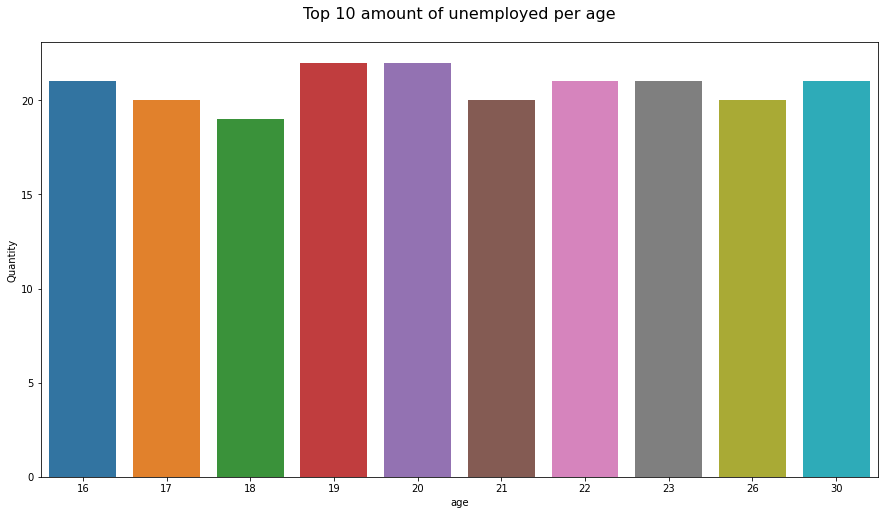

In [25]:
AmountUnemployedAge(graphic_unem_age);

In [26]:
def TopUnemployedCountry(graphic_unem_country):
    title = 'Top 10 amount of unemployed per country'
    graphics = graphic_unem_country.sort_values('Quantity', ascending=False)
    plt.figure(figsize=(15, 8))
    chart_unem_country = sns.barplot(data=graphics, x='Country', y='Quantity')
    plt.title(title + "\n", fontsize=16)
    return chart_unem_country

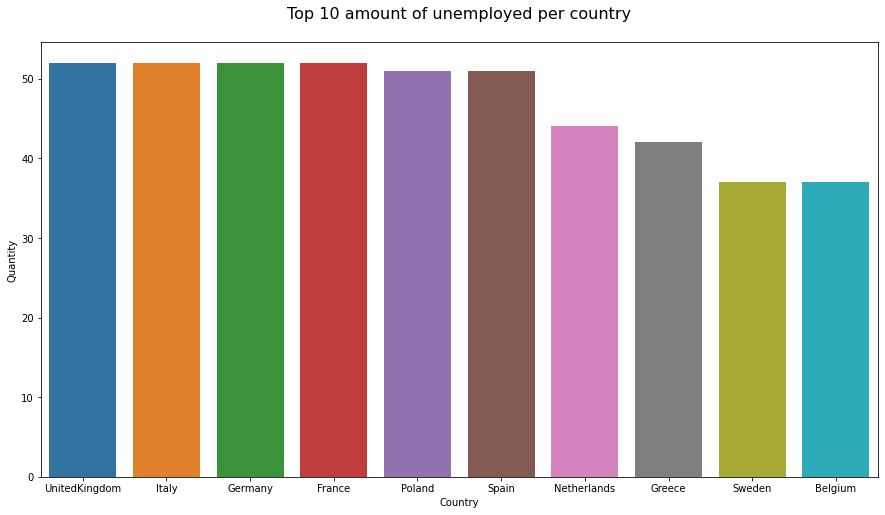

In [27]:
TopUnemployedCountry(graphic_unem_country);

In [28]:
def TopAmountSurveys(graphic_amountsurveys_country):
    title = 'Top 10 amount of surveys per country'
    graphics = graphic_amountsurveys_country.sort_values('Quantity', ascending=False)
    plt.figure(figsize=(15, 8))
    chart_amountsurveys = sns.barplot(data=graphics, x='Country', y='Quantity')
    plt.title(title + "\n", fontsize=16)
    return chart_amountsurveys

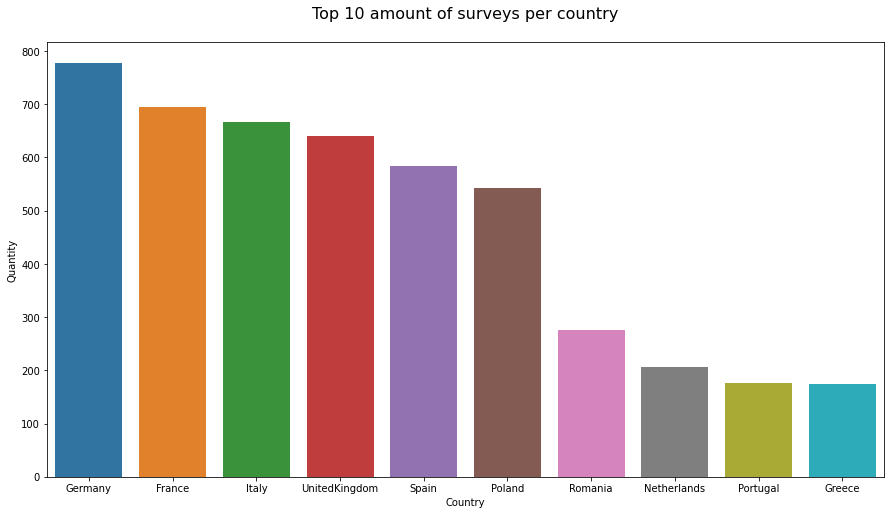

In [29]:
TopAmountSurveys(graphic_amountsurveys_country);

In [6]:
# saving plots

file_name = '../data/results/' + title + '.png'
fig = barchart.get_figure()
fig.savefig(file_name)